# Exercise: Detect and Analyze Faces With the Azure Face Service

In this notebook, you explore some of the capabilities of the Azure Face service using the `FaceClient` object found in the Azure Cognitive Services Python SDK.

> **Important**: Several cells in this notebook contain `TODO` statements, where you need to update variables or enter code to enable the cell to execute without errors.


## Set up the notebook

### Install the Azure Cognitive Services Face Library

To access the Face service from this Python notebook, you need to install the Azure Cognitive Services Face Library. This library is part of the [Azure SDK for Python](https://github.com/Azure/azure-sdk-for-python) GitHub project.

> To learn more, read the [Azure Cognitive Services modules for Python](https://docs.microsoft.com/python/api/overview/azure/cognitive-services?view=azure-python) article in Microsoft Docs.

`TODO`: In the cell below, complete the `pip install` command to install the Azure Cognitive Services Face library, and then execute the cell.


In [2]:
pip install pip install azure-cognitiveservices-vision-face

     |████████████████████████████████| 66 kB 2.8 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


### Import libraries and services

In addition to the Face library, we will also make use of a few other Python libraries in this notebook. Run the following cell to import the libraries and reference the services required to execute the cells below.

In [4]:
# Import the libraries need to call the Face service and execute the remaining cells in this notebook
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from py_code import faces # Custom Python code file located in py_code/faces.py.
import matplotlib.pyplot as plt
from PIL import Image
import os

## Set variables

To access your Azure Cognitive Services account, you must reference its authentication `key` and service `endpoint`.

### Retrieve and set the `key` and `endpoint` values from your Azure Cognitive Services account.

`TODO`: Using the values from the `Keys and Endpoints` page for you Cognitive Services account, replace the tokenized values in the cell below, as follows:

- Retrieve the `Key 1` value for your cognitive services resource in the Azure portal and update the `key` value below.
- Retrieve the `Endpoint` value for your cognitive services resource in the Azure portal and update the `endpoint` value below.

> **Important**: You **must** replace the variable values below with the values from your Cognitive Services account or the remaining cells in this notebook will fail.

In [5]:
# TODO: Update the variables below with values from your Cognitive Services account
key = 'd1b33c8b0af44e8d83c76b0e5091c089'
endpoint = 'https://udacity-cog-services-jg1.cognitiveservices.azure.com/'

print('Ready to analyze faces using the Azure Face service at {}.'.format(endpoint))

Ready to analyze faces using the Azure Face service at https://udacity-cog-services-jg1.cognitiveservices.azure.com/.


## Create a Face client

After setting the `key` and `endpoint` values needed to access your Face service, you can instantiate a new client.

`TODO`: Complete the code below to instantiate a new `FaceClient`, authenticating against your Azure Cogntive Services account, and then execute the cell below to create the `FaceClient` object.

In [7]:
# Instantiate a Face client
credentials = CognitiveServicesCredentials(key)
client = FaceClient(endpoint, credentials)

## Detect faces

`TODO`: In the cell below, locate the `TODO` statement (after `faceResults = client.`) and complete the line of code to call a `detect` operation of the `face` object that accepts an image data stream as an argument.

> We covered this in the demo and lesson, but if you need help, you can learn more by reading the [FaceOperations documentation](https://docs.microsoft.com/python/api/azure-cognitiveservices-vision-face/azure.cognitiveservices.vision.face.operations.faceoperations?view=azure-python#detect-with-stream-image--return-face-id-true--return-face-landmarks-false--return-face-attributes-none--recognition-model--recognition-01---return-recognition-model-false--detection-model--detection-01---custom-headers-none--raw-false--callback-none----operation-config-).

Each detected face is assigned a unique ID, allowing your application to identify each individual face that was detected.

After fixing the code on the `TODO` line, run the cell below.

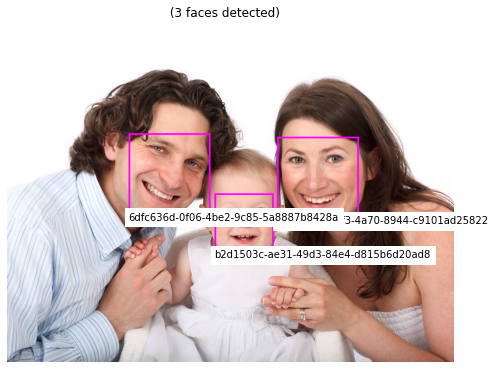

In [8]:
%matplotlib inline

# Set the path to the image
imagePath = os.path.join('images', 'family.jpg')

# Detect faces
with open(imagePath, mode="rb") as imageData:
    faceResults = client.face.detect_with_stream(imageData)

# Display the faces and output the Face Id for each detected face.
faces.show_faces(imagePath, faceResults, show_id=True)

## Analyze facial attributes

The Azure Face service is capable of much more than simply detect faces. Using the `return_face_attributes` argument, we can also analyze facial features and expressions. These attributes allow the Face service to predict approximate age and evaluate any emotional expressions present on the face.

`TODO`: Locate the `TODO` statement in the cell below and complete the `client.face.detect_with_stream()` statement, passing in two arguments. The first argument should contain the stream data for the image, and the second should request that the Face service return the specified attributes about any faces in the image.

After completing the `TODO`, execute the cell below to analyze the facial attributes of the women in our image.

{'age': 1.0, 'gender': 'male', 'emotion': {'anger': 0.548, 'contempt': 0.021, 'disgust': 0.178, 'fear': 0.0, 'happiness': 0.001, 'neutral': 0.251, 'sadness': 0.001, 'surprise': 0.0}}


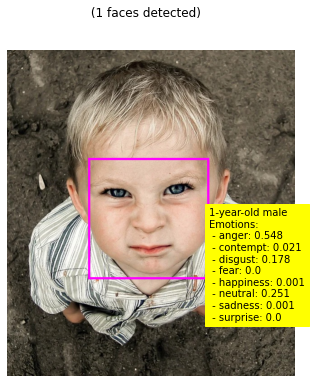

In [9]:
# Open an image
imagePath = os.path.join('images', 'child.jpg')

# Detect faces and specified facial attributes
attributes = ['age', 'gender', 'emotion']

# Detect faces
with open(imagePath, mode="rb") as imageData:
    faceResults = client.face.detect_with_stream(imageData, return_face_attributes=attributes)

# Display the faces
faces.show_faces(imagePath, faceResults, show_attributes=True)

Let's run the same code again, this time using a different face. We will also add in two additional facial attributes, `facial_hair` and `hair`.

`TODO`: Make sure the update the `TODO` in this cell using the same code you came up with in the cell above to display the requested attributes, and then execute the cell below to examine the results.

{'age': 40.0, 'gender': 'male', 'facial_hair': {'moustache': 0.6, 'beard': 0.6, 'sideburns': 0.6}, 'emotion': {'anger': 1.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.0, 'neutral': 0.0, 'sadness': 0.0, 'surprise': 0.0}, 'hair': {'bald': 0.83, 'invisible': False, 'hair_color': []}}


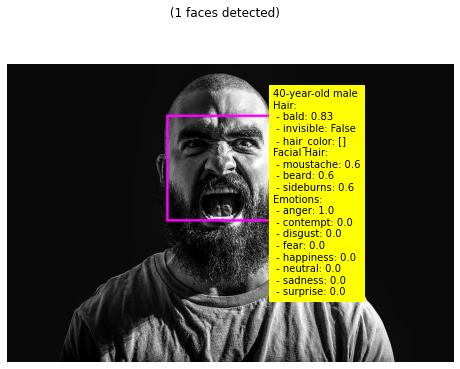

In [10]:
# Open an image
imagePath = os.path.join('images', 'man.jpg')

# Detect faces and specified facial attributes
attributes = ['age', 'gender', 'emotion', 'facialHair', 'hair']

# Detect faces
with open(imagePath, mode="rb") as imageData:
    faceResults = client.face.detect_with_stream(imageData, return_face_attributes=attributes)

# Display the faces
faces.show_faces(imagePath, faceResults, show_attributes=True)

## Find similar faces

When faces are detected using the Face service, each one is assigned a unique `Face Id`. Face Ids are used to individually identify face detections. You can use these Ifs to compare a detected face to previously detected faces and find faces with similar features.

`TODO`: Complete the `similarFaces = client.` line near the bottom of the cell below, using a method of the Face service that allows you to find similar faces in two different images.

Once the `TODO` code has been updated, run the cell below to compare the face in one image with the face in another, and check to see if it is matching face.

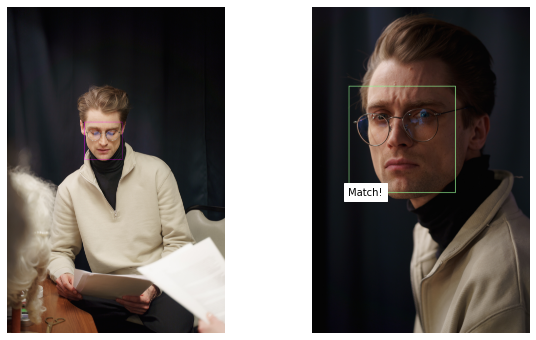

In [11]:
# Set the paths to the two images to compare
imageOnePath = os.path.join('images', 'man-01.jpg')
imageTwoPath = os.path.join('images', 'man-02.jpg')

# Detect faces in the first image
with open(imageOnePath, mode="rb") as imageOneData:
    faceOneResults = client.face.detect_with_stream(imageOneData)

# Retrieve the first face identified in the image
faceOne = faceOneResults[0]

# Detect faces in the second image
with open(imageTwoPath, mode="rb") as imageTwoData:
    faceTwoResults = client.face.detect_with_stream(imageTwoData)

# Retrieve the face Ids found in the second image.
imageTwoFaceIds = list(map(lambda face: face.face_id, faceTwoResults))

# Find faces in image two that are similar to the face in image one
similarFaces = client.face.find_similar(face_id=faceOne.face_id, face_ids=imageTwoFaceIds)

# Show the face in image 1, and similar faces in image 2
faces.show_similar_faces(imageOnePath, faceOne, imageTwoPath, faceTwoResults, similarFaces)

Run the same code again, this time with two different faces and observe the results.

`TODO`: Make sure the update the `TODO` in this cell using the same code you came up with in the cell above to compare similar faces between the two images.

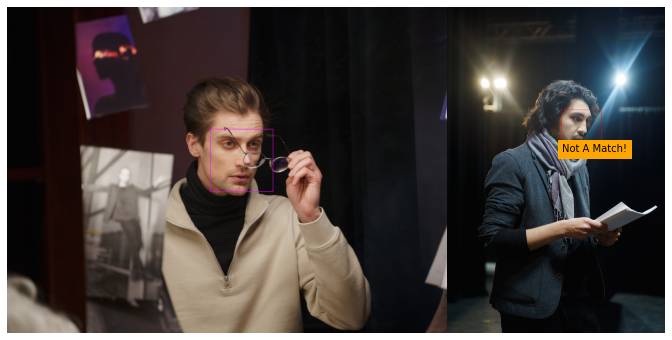

In [14]:
# Set the paths to the two images to compare
imageOnePath = os.path.join('images', 'man-03.jpg')
imageTwoPath = os.path.join('images', 'man-05.jpg')

# Detect faces in the first image
with open(imageOnePath, mode="rb") as imageOneData:
    faceOneResults = client.face.detect_with_stream(imageOneData)

# Retrieve the first face identified in the image
faceOne = faceOneResults[0]

# Detect faces in the second image
with open(imageTwoPath, mode="rb") as imageTwoData:
    faceTwoResults = client.face.detect_with_stream(imageTwoData)

# Retrieve the face Ids found in the second image.
imageTwoFaceIds = list(map(lambda face: face.face_id, faceTwoResults))

# Find faces in image two that are similar to the face in image one
similarFaces = client.face.find_similar(face_id=faceOne.face_id, face_ids=imageTwoFaceIds)

# Show the face in image 1, and similar faces in image 2
faces.show_similar_faces(imageOnePath, faceOne, imageTwoPath, faceTwoResults, similarFaces)

In [15]:
client.face.find_similar(face_id=faceOne.face_id, face_ids=imageTwoFaceIds)

[]